### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

### Data loading

In [ ]:
# Load dataset from csv file
dataset = pd.read_csv('Social_Network_Ads.csv', sep=',')

dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


User ID column cannot have any affect on purchasing so it must be excluded.

In [ ]:
if 'User ID' in dataset.columns:
  dataset.drop(['User ID'], axis = 1, inplace = True)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Exploration data analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


#### Check number of unique values and their balance in categorical variable 'Gender'

<BarContainer object of 2 artists>

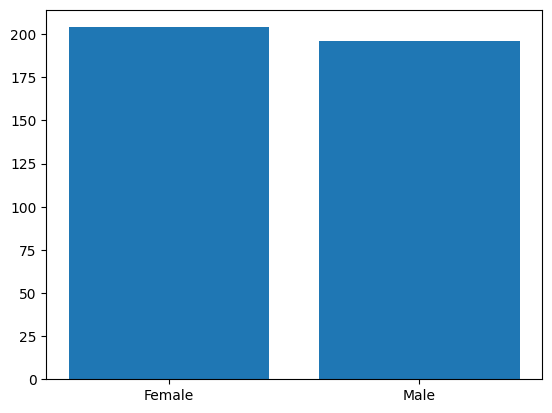

In [ ]:
unique_values, counts = np.unique(dataset['Gender'], return_counts=True)
plt.bar(x = unique_values, height = counts)
plt.show()

#### Check distribution of age among users and possible outliers

<BarContainer object of 43 artists>

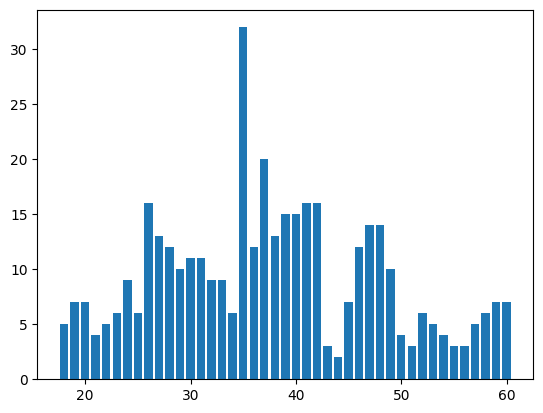

In [ ]:
unique_values, counts = np.unique(dataset['Age'], return_counts=True)
plt.bar(x = unique_values, height = counts)
plt.show()

#### Check distribution of salary among users and possible outliers

(array([22., 29., 25., 14., 25., 33., 34., 16., 45., 37., 32.,  8.,  9.,
        13.,  9., 10.,  5., 12., 10., 12.]),
 array([ 15000.,  21750.,  28500.,  35250.,  42000.,  48750.,  55500.,
         62250.,  69000.,  75750.,  82500.,  89250.,  96000., 102750.,
        109500., 116250., 123000., 129750., 136500., 143250., 150000.]),
 <BarContainer object of 20 artists>)

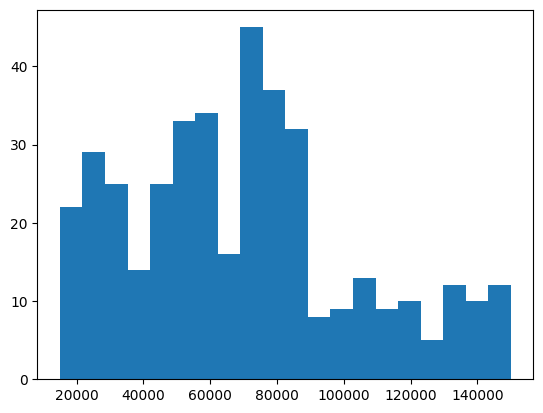

In [ ]:
plt.hist(dataset['EstimatedSalary'], bins = 20)
plt.show()

#### In the final, check number of classes and their balance

<BarContainer object of 2 artists>

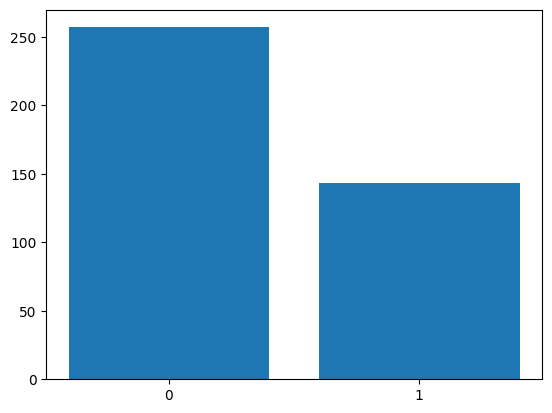

In [ ]:
unique_values, counts = np.unique(dataset['Purchased'].astype(str), return_counts=True)
plt.bar(x = unique_values, height = counts)
plt.show()

### Data preparation

#### Separate independent and dependent variables

In [ ]:
# Divide dataset to X - independent features, which we will use to define class
# and y - class labels for each data record (data vector)
X = dataset.iloc[:, [0, 1, 2]].values
y = dataset.iloc[:, -1].values

In [ ]:
# Lets look at first 5 vectors
X[:5], y[:5]

(array([['Male', 19, 19000],
        ['Male', 35, 20000],
        ['Female', 26, 43000],
        ['Female', 27, 57000],
        ['Male', 19, 76000]], dtype=object),
 array([0, 0, 0, 0, 0]))

#### Encode categorical variable "Gender"

In [ ]:
# Since our dataset containing character variables we have to encode it using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
X[:5]

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       [0, 27, 57000],
       [1, 19, 76000]], dtype=object)

In [ ]:
le.classes_

array(['Female', 'Male'], dtype=object)

#### Divide dataset into train, validation and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size = 0.40, random_state = 0, shuffle = True)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.50, random_state = 0, shuffle = True)

print(f'Num. vectors in train: {len(X_train)} | Num. vectors in valid: {len(X_valid)} | Num. vectors in test: {len(X_test)}')

Num. vectors in train: 240 | Num. vectors in valid: 80 | Num. vectors in test: 80


#### Normalize data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1:] = sc.fit_transform(X_train[:, 1:])
X_valid[:, 1:] = sc.transform(X_valid[:, 1:])
X_test[:, 1:] = sc.transform(X_test[:, 1:])

In [ ]:
X_train[:5]

array([[1, -0.2669906863166231, -0.20381468358755434],
       [0, -1.6407865607788805, 0.001097745153972465],
       [0, -0.9538886235477518, -0.7014591533884051],
       [1, 0.3217789741672016, 0.557288623166688],
       [0, -0.07073413282201486, -1.0234643985536616]], dtype=object)

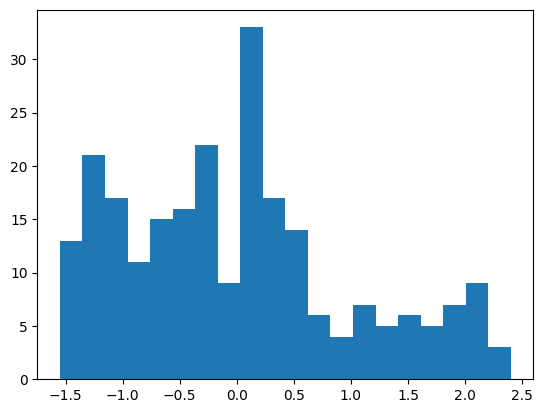

In [ ]:
plt.hist(X_train[:, 2], bins = 20)
plt.show()

### Train model

#### Fit kNN classifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

#### Find best value for k

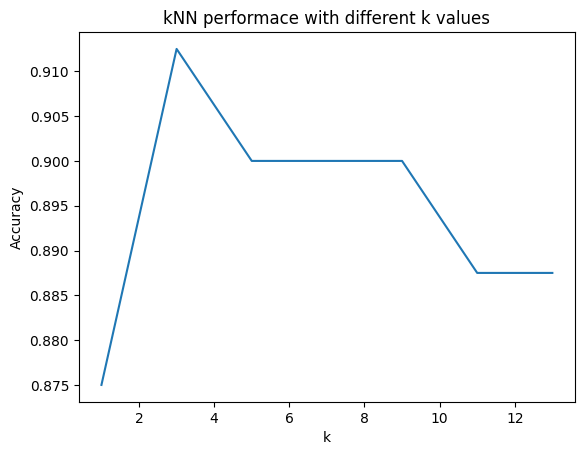

In [ ]:
accuracy_list = []
for k in range(1, 15, 2):
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_valid)
  accuracy = sum(y_valid == y_pred) / len(y_pred)
  accuracy_list.append(accuracy)

plt.plot(range(1,15,2), accuracy_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN performace with different k values')
plt.show()

### Measure metrics on test set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
print(f'Accuracy on the test set: {ac * 100}%')

Accuracy on the test set: 91.25%


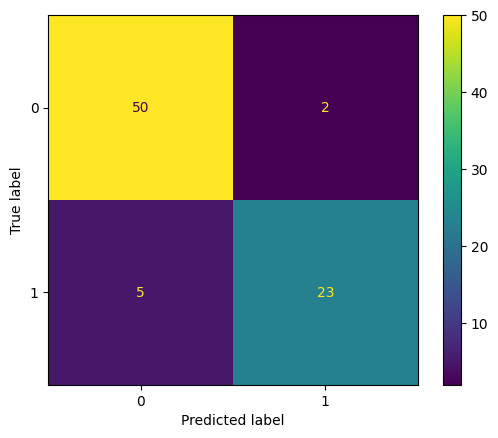

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
display.plot()

### Conclusion:
- For 73 customers we correcly predicted purchasing decision
- For 2 customers we predicted positive decision in purchasing but actually it's not (We name it "False Positive")
- For 5 customers we predicted negative decision when they actually purchased (We name it "False Negative")